# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

In [4]:
# Let's check the type of each variable

print( 'car_age' + ' ' +'is' + ' '+  str(df['car_age'].dtype))
print( 'age_oldest' + ' ' +'is' + ' '+  str(df['age_oldest'].dtype))
print( 'age_youngest' + ' ' +'is' + ' '+  str(df['age_youngest'].dtype))
print( 'duration_previous' + ' ' +'is' + ' '+  str(df['duration_previous'].dtype))
print( 'C_previous' + ' ' +'is' + ' '+  str(df['C_previous'].dtype))
print( 'homeowner' + ' ' +'is' + ' '+  str(df['homeowner'].dtype))
print( 'group_size' + ' ' +'is' + ' '+  str(df['group_size'].dtype))

# car_age is repeat, and all categories are int

car_age is int64
age_oldest is int64
age_youngest is int64
duration_previous is float64
C_previous is float64
homeowner is int64
group_size is int64


<AxesSubplot:xlabel='G', ylabel='cost'>

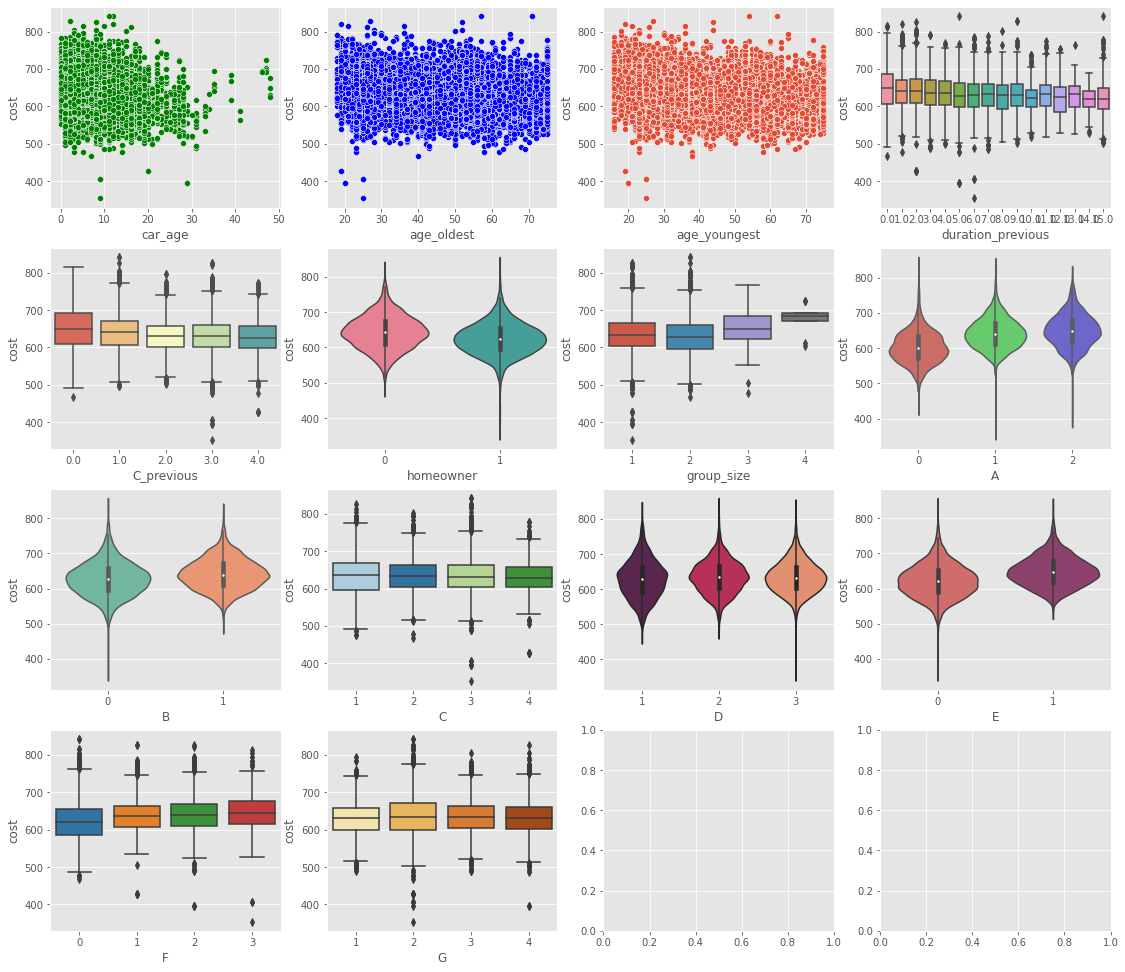

In [5]:
f, axes = plt.subplots(4, 4, figsize = (19,17))
sns.scatterplot(  y="cost", x= "car_age", data=df, color='g', ax=axes[0,0])
sns.scatterplot(  y="cost", x= "age_oldest", data=df,color ='b', ax=axes[0,1])
sns.scatterplot(  y="cost", x= "age_youngest", data=df, ax=axes[0,2])
sns.boxplot(  y="cost", x= "duration_previous", data=df, ax=axes[0,3])

sns.boxplot(  y="cost", x= "C_previous", data=df, palette = 'Spectral', ax=axes[1,0])
sns.violinplot(  y="cost", x= "homeowner", data=df, palette = 'husl', ax=axes[1,1])
sns.boxplot(  y="cost", x= "group_size", data=df, ax=axes[1,2])
sns.violinplot(  y="cost", x= "A", data=df, palette = 'hls', ax=axes[1,3])

sns.violinplot(  y="cost", x= "B", data=df,palette = 'Set2', ax=axes[2,0])
sns.boxplot(  y="cost", x= "C", data=df,palette = 'Paired', ax=axes[2,1])
sns.violinplot(  y="cost", x= "D", data=df,palette = 'rocket', ax=axes[2,2])
sns.violinplot(  y="cost", x= "E", data=df, palette = 'flare',ax=axes[2,3])

sns.boxplot(  y="cost", x= "F", data=df,palette = 'tab10', ax=axes[3,0])
sns.boxplot(  y="cost", x= "G", data=df,palette = 'YlOrBr',  ax=axes[3,1])

**Analysis:** It is very important when performing any type of analysis to perform statistics and descriptive graphs. At this point each important column of the dataset, which was suggested at the beginning, was addressed and plotted against the variable to be regressed, in order to visually observe if there is any kind of relationship or pattern that may be indicative to the analyst of the nature of the data.

On the other hand, it is important to note that the most appropriate type of graph was studied for each column, since it was observed that the dataset had discrete numerical columns, and others that were continuous, so the graphs should consider this.


-------

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [6]:
df2 = df.copy() 

Check if any columns has `null` or `na` values

In [7]:
df2.isnull().sum()

Unnamed: 0            0
state                 0
group_size            0
homeowner             0
car_age               0
car_value            48
risk_factor           0
age_oldest            0
age_youngest          0
married_couple        0
C_previous            0
duration_previous     0
A                     0
B                     0
C                     0
D                     0
E                     0
F                     0
G                     0
cost                  0
dtype: int64

We are going to eliminate the null records that appear in the dataset (`colum car_value`), since there are only 48 records out of 15843, which means 0.3% from all records.

In [8]:
df2 = df2[df2['car_value'].notnull()]

Now we are going to use the method applied in class. *Note:This can also be done by using the sklearn library to adjust the encoder*

In [9]:
index = pd.Index(['state', 'car_value'])
one_hot = pd.get_dummies(df2[index], dummy_na = False)
one_hot.head(2)

,state_AL,state_AR,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_IA,state_ID,...,state_WY,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# merge (concat)
df2 = pd.concat([df2, one_hot], axis = 1)
df2.head(2)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,state_WY,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
0,0,OK,1,0,9,f,0.0,24,24,0,...,0,0,0,0,0,0,1,0,0,0
1,1,OK,1,0,9,f,0.0,24,24,0,...,0,0,0,0,0,0,1,0,0,0


**Analysis:** One hot coding is widely used to deal with categorical variables in machine learning modeling. This allows mainly categorical data to be converted into numerical data and thus to be interpreted by the models. In this case the pandas function of get_dummies was used to convert the categorical variables state and car_Value to a numerical format that can be interpreted by the model to be used later. This transformation could also be done with other libraries. 



-------

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

There are several ways to perform this partitioning, the most known is using the sklearn train test split library, however we will follow how it was performed in the course classes

In [11]:
np.random.seed(1337) 

# Lenght data and percentage
n = len(df2)
prc = 0.8

# Select index of dataset that will be the train data
index_train = np.random.choice(range(n),int(prc*n),replace=False)

# Select index of dataset that will be the train data
index_test  = np.asarray(list(set(range(n)) - set(index_train)))


In [12]:
# Split complete dataset into  train and test with index 
train= df2.iloc[index_train] 
test = df2.iloc[index_test]  

**Analysis:** In this section we make a division of the data into two parts, one that has 80% of the information and the other 20%, this is known as the train and test partition and is basically used to train statistical learning models, using the train dataset to fit and calibrate the model parameters and the test set to test how well the model fits.

-------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [13]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

model_all = smf.ols(formula = "cost ~ group_size + homeowner + car_age"
                           "+ risk_factor + age_oldest + age_youngest"
                           "+ married_couple + C_previous + duration_previous"
                           "+ A + B + C + D + E + F + G"
                           "+ state_AL + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL"
                           "+ state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD"
                           "+ state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH"
                           "+ state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA"
                           "+ state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV"
                           "+ state_WY + car_value_a + car_value_b + car_value_c + car_value_d"
                           "+ car_value_e +  car_value_f + car_value_g + car_value_h + car_value_i"
                           , 
                 data = train).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:48:47   Log-Likelihood:                -61640.
No. Observations:               12348   AIC:                         1.234e+05
Df Residuals:                   12280   BIC:                         1.239e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           566.4303      2.39

In [14]:
print('The AIC of the model taking into account all the variables is ' + '' + str(round(model_all.aic,1)))

The AIC of the model taking into account all the variables is 123416.9


**Analysis:** In this exercise we perform our first linear regression adjustment to estimate the cost from other variables in the dataset, we do it through the `statsmodels` library and using the traditional statistical formula $Y$ ~ $X_1$ + $X_2$ + $X_3$ + ... + $X_n$ where in this case our $X$ variables are all the columns of the dataset, since all of them are already in numerical format we will not have any inconvenience for the calculation.

From the summary that gives us the model fit we can observe a not very high $R^2$ of 0.43, which means that the regression model explains 43% of the variability of all the data, and we also found a value of AIC (Akaike's information criterion), which is a measure of the relative quality of a statistical model for a given set of data and is mainly used to select a model, of 123416.9, which will be compared later with other regression models.



-------

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

According to the coefficients estimated by the regression model, the three least expensive states are state_IA, state_ME and state_WI respectively, and the 3 most expensive are state_NY, state_DE and state_DC respectively.

-------

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

The interpretations for each requested variable are described below:

* group_size: For each additional person in this variable the cost of the policy is increased by 3.3 monetary units.

* homeowner: Homeownership causes the cost of the policy to decrease by 14 monetary units.

* car_age: With a 1 year increase in the age of the car, the cost of the policy decreases by 0.7 monetary units. (This seems to be contradictory)

* risk_factor: With an increase in the client's risk the cost of the policy decreases by 0.5 monetary units. (This seems to be contradictory)

* age_oldest: As the age of the oldest person in the group increases, the policy cost increases by 0.6 monetary units.

* age_youngest_ As the age of the youngest person in the group increases, the cost of the policy decreases by 1 monetary unit. (This seems to be contradictory)

* married_couple If the household contains a member who is married, the cost of the policy decreases by 10 monetary units. 

* duration previous: Before the increase of the time of your last incident the cost of the policy decreases by 1.4 monetary units.  


There are some results that do not seem to make sense in the business context we are analyzing.

-------

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

valor p > 0.05 no son significativas para el modelo

**Answer.**

In [15]:
# Lets check which variables are not significant
model_all.pvalues[model_all.pvalues>0.05]

C[T.2]      0.257502
C[T.3]      0.135381
D[T.2]      0.164439
D[T.3]      0.136719
G[T.3]      0.557538
state_ID    0.587550
state_KS    0.211454
state_MT    0.628966
state_NE    0.401587
state_NH    0.167028
state_SD    0.878359
state_UT    0.374858
state_WY    0.067031
dtype: float64

There are some variables in column C that are not significant, however, since at least 1 of these categories in column C is significant, then group C will not be excluded. The same is true for column G and the states, some of the categories are not significant but since at least 1 of them is significant then the group is not eliminated.

Column D, on the other hand, has all its categories not significant, so only column D is removed. 

In [16]:
model_sig = smf.ols(formula = "cost ~ group_size + homeowner + car_age"
                           "+ risk_factor + age_oldest + age_youngest"
                           "+ married_couple + C_previous + duration_previous"
                           "+ A + B + C + E + F + G"
                           "+ state_AL + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL"
                           "+ state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD"
                           "+ state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH"
                           "+ state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA"
                           "+ state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV"
                           "+ state_WY + car_value_a + car_value_b + car_value_c + car_value_d"
                           "+ car_value_e +  car_value_f + car_value_g + car_value_h + car_value_i"
                           , 
                 data = train).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     144.5
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:48:47   Log-Likelihood:                -61642.
No. Observations:               12348   AIC:                         1.234e+05
Df Residuals:                   12282   BIC:                         1.239e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           565.8240      2.36

In [17]:
print('The AIC of the model which variables statistically significant is ' + '' + str(round(model_sig.aic,1)))

The AIC of the model which variables statistically significant is 123415.3


**Analysis:** For this case the regression model was performed again but only taking into account the significant variables by means of the p-value, it is observed that there are no significant changes in the $R^2$ and that the AIC is practically the same as when the regression was performed with all the variables, although it decreases only a little bit.

-------

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [18]:
model_sig_plus = smf.ols(formula = "cost ~ group_size + homeowner + car_age+ I(car_age**2)"
                           "+ risk_factor + age_oldest + age_youngest + I(age_youngest**2)"
                           "+ married_couple + C_previous + duration_previous"
                           "+ A + B + C + E + F + G"
                         
                           "+ state_AL + state_AR + state_CO + state_CT + state_DC + state_DE + state_FL"
                           "+ state_GA + state_IA + state_ID + state_IN + state_KS + state_KY + state_MD"
                           "+ state_ME + state_MO + state_MS + state_MT + state_ND + state_NE + state_NH"
                           "+ state_NM + state_NV + state_NY + state_OH + state_OK + state_OR + state_PA"
                           "+ state_RI + state_SD + state_TN + state_UT + state_WA + state_WI + state_WV"
                         
                           "+ state_WY + car_value_a + car_value_b + car_value_c + car_value_d + car_value_e"
                           "+car_value_f + car_value_g + car_value_h + car_value_i + car_value_a*age_youngest" 
                           "+ car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest" 
                           "+ car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest" 
                           "+ car_value_h*age_youngest + car_value_i*age_youngest"
                           , 
                 data = train).fit()
print(model_sig_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:48:48   Log-Likelihood:                -61485.
No. Observations:               12348   AIC:                         1.231e+05
Df Residuals:                   12272   BIC:                         1.237e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [19]:
print('The AIC of the model for model_sig_plus is ' + '' + str(round(model_sig_plus.aic,1)))

The AIC of the model for model_sig_plus is 123121.5


**Analysis:** For this case, 3 additions of variables were made to the previous model, where non-linear transformations are added to the model in order to observe if there is any improvement in the fit. The regression model was performed again taking into account the significant variables of the previous model and with the addition of these transformations, it is observed that in this case the $R^2$ does go up a little more and that the AIC also drops being better than the previous model.

-------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [20]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [21]:
train_reg = train.join(state_regions.set_index('State Code')["Region"], on='state')
test_reg = test.join(state_regions.set_index('State Code')["Region"], on='state')

In [22]:
# Encoding region

index_region = pd.Index(['Region'])

# One hot region in train and tes
one_hot_region_train = pd.get_dummies(train_reg[index_region], dummy_na = False)
one_hot_region_test = pd.get_dummies(test_reg[index_region], dummy_na = False)

# concat with complete data train and test
train_reg = pd.concat([train_reg, one_hot_region_train], axis = 1)
test_reg =  pd.concat([test_reg, one_hot_region_test], axis = 1)

**Analysis:** In this exercise, we cross-referenced the data with the region in order to reduce the number of variables that we had when handling the data at the state level. What is done after the crossover is to perform the one hot coding to handle the same format that we were working with the states.

-------

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [23]:
model_region = smf.ols(formula = "cost ~ group_size + homeowner + car_age+ I(car_age**2)"
                           "+ risk_factor + age_oldest + age_youngest + I(age_youngest**2)"
                           "+ married_couple + C_previous + duration_previous"
                           "+ A + B + C + E + F + G"
                         
                           "+ Region_Midwest + Region_Northeast + Region_South + Region_West"
                         
                           "+ car_value_a + car_value_b + car_value_c + car_value_d + car_value_e"
                           "+car_value_f + car_value_g + car_value_h + car_value_i + car_value_a*age_youngest" 
                           "+ car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest" 
                           "+ car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest" 
                           "+ car_value_h*age_youngest + car_value_i*age_youngest"
                           , 
                 data = train_reg).fit()
print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     171.5
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:48:49   Log-Likelihood:                -62249.
No. Observations:               12348   AIC:                         1.246e+05
Df Residuals:                   12304   BIC:                         1.249e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [24]:
print('The AIC of the model for model_region is ' + '' + str(round(model_region.aic,1)))

The AIC of the model for model_region is 124586.4


**Analysis:** In this case, the states were replaced by a broader category, which are the regions, which considerably reduces the number of columns or variables with which the model works. The regression model was performed again taking into account the significant variables, the addition of the column transformations and now taking into account the region and not the state, it is observed that in this case the 𝑅2 in this model decreases and is located at 0.37 and that the AIC increases its value with respect to the previous models, which does not make it attractive to be selected as the best model.

-------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.** There are many techniques widely used in the state of the art, three very popular are dimensionality reduction, using regression with lasso regularization (l1) and elimination of linearly dependent variables.

Dimensionality reduction tries to find a subset of the original variables. There are three strategies; filter (eg, information gain), wrapper (eg, precision-guided searches), approaches, and embedded (features are selected to add or remove while building the model based on prediction errors). In some cases, data analysis such as regression or classification can be done in the reduced space with more precision than in the original space.

On the other hand, the regression with regularization lasso allows me to discard those variables of the model that are not important or do not improve the model, this is done by means of a penalty to the cost function

Finally, the elimination of linearly dependent variables is also known as multicollinearity, and is the high correlation between more than two explanatory variables.

-------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

In [25]:
import numpy as np

In [26]:
# Select only principals columns without transformations made in exc 6
train2 = ["cost", "group_size", "homeowner", "car_age",
          "risk_factor", "age_oldest",  "age_youngest",
          "married_couple",  "C_previous", "duration_previous",
           "A",  "B",  "C",  "E",  "F",  "G",
          "Region_Midwest", "Region_Northeast", "Region_South", "Region_West",
          "car_value_a",  "car_value_b",  "car_value_c",  "car_value_d",  "car_value_e",
          "car_value_f",  "car_value_g",  "car_value_h",  "car_value_i"]

train_reg2 = train_reg[train2]
train_reg2 = train_reg2.astype('int')


In [27]:
# Create absolute correlation matrix, select de upper triangle of matriz, and select the columns with more correlation
thresold = 0.7 # Our umbral 
corr_matrix = train_reg2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_columns = [column for column in upper.columns if any(upper[column] > thresold)]

# Lets check de columns
drop_columns

['age_youngest', 'married_couple']

**Analysis:** We calculate the correlation matrix and select the columns with the highest level of correlation and these will not be taken into account for the model that is built below. Of course there are more and much more sophisticated techniques, using for example eigenvalues and eigenvectors of the correlation matrix, but in this case we use this as an academic exercise

-------

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

-------

In [28]:
model_region_no_oldest = smf.ols(formula = "cost ~ group_size + homeowner + car_age+ I(car_age**2)"
                           "+ risk_factor + age_oldest + I(age_youngest**2)"
                           "+ C_previous + duration_previous"
                           "+ A + B + C + E + F + G"
                         
                           "+ Region_Midwest + Region_Northeast + Region_South + Region_West"
                         
                           "+ car_value_a + car_value_b + car_value_c + car_value_d + car_value_e"
                           "+car_value_f + car_value_g + car_value_h + car_value_i + car_value_a*age_youngest" 
                           "+ car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest" 
                           "+ car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest" 
                           "+ car_value_h*age_youngest + car_value_i*age_youngest"
                           , 
                 data = train_reg).fit()
print(model_region_no_oldest.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     174.5
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:48:49   Log-Likelihood:                -62263.
No. Observations:               12348   AIC:                         1.246e+05
Df Residuals:                   12305   BIC:                         1.249e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [29]:
print('The AIC of the model for model_region_no_oldest is ' + '' + str(round(model_region_no_oldest.aic,1)))

The AIC of the model for model_region_no_oldest is 124612.1


**Analysis:** This model was based on the one calculated for the regions and only the variables that came out of the previous correlation exercise were eliminated. An $ R ^ 2 $ is observed very similar to the base model of regions and the AIC, on the contrary, worsens a bit, being higher than the model of regions, which may be an indication that we are withdrawing relevant information for the cost estimate. For this, other more advanced techniques to solve the problem of variable selection, dimensionality reduction and multicollinearity treatment could be reviewed.

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

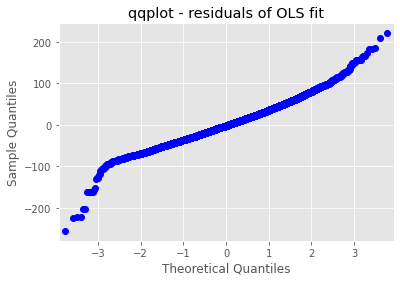

In [30]:
# Graph 1 - Check the qqplot of residuals
res = model_region_no_oldest.resid # residuals
pplot = sm.ProbPlot(res)
fig = pplot.qqplot()
h = plt.title("qqplot - residuals of OLS fit")
plt.show()

**Analysis:** Looking at the qqplot graph of the residuals, it can be seen that there are several points that are far away from the main diagonal, more towards the tails. This indicates that the errors are not distributed normally

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


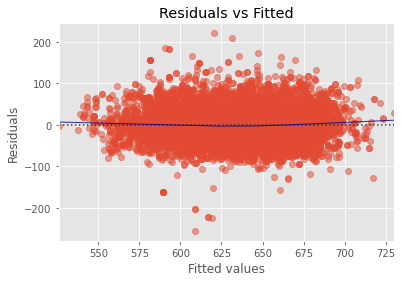

In [31]:
# Residuals vs Fitted

model_fitted_y = model_region_no_oldest.fittedvalues
model_residuals = model_region_no_oldest.resid
model_norm_residuals = model_region_no_oldest.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model_region_no_oldest.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_region_no_oldest.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, train_reg.columns[19], data=train_reg,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

**Analysis:** This graph should look like noise or random dots with no obvious pattern. We find the line in dark blue which should be completely horizontal to indicate that there is no information that can be extracted from the residuals, however we find a slight curve that indicates that it is possible that there are characteristics that were not taken into account in the modeling

-------

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [32]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Box cox transformation
y,fitted_lambda= boxcox(train_reg['cost'].values,lmbda=None)
train_reg['cost'] = y

In [33]:
# Lets see the cost data
train_reg['cost']

454      69.224207
7149     66.054996
10571    68.142052
306      64.695025
6038     69.280806
           ...    
11570    62.153906
11809    68.256576
8222     61.413323
8353     63.736038
427      68.313783
Name: cost, Length: 12348, dtype: float64

**Analysis:** The Box and Cox transformations are potential transformations used to correct biases in the error distribution, also to correct for uneven variations and widely used to correct for non-linearity in the relationship (improve the correlation between variables). For this case we use the transformation of boxcox from the scipy library, this function requires that the input data be positive and the argument of lmbda = None, is to find the lambda that maximizes the logarithmic probability function and is returned as the second argument of output of the function

-------

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [34]:
model_region_no_oldest_box_cox = smf.ols(formula = "cost ~ group_size + homeowner + car_age+ I(car_age**2)"
                           "+ risk_factor + age_oldest + I(age_youngest**2)"
                           "+ C_previous + duration_previous"
                           "+ A + B + C + E + F + G"
                         
                           "+ Region_Midwest + Region_Northeast + Region_South + Region_West"
                         
                           "+ car_value_a + car_value_b + car_value_c + car_value_d + car_value_e"
                           "+car_value_f + car_value_g + car_value_h + car_value_i + car_value_a*age_youngest" 
                           "+ car_value_b*age_youngest + car_value_c*age_youngest + car_value_d*age_youngest" 
                           "+ car_value_e*age_youngest + car_value_f*age_youngest + car_value_g*age_youngest" 
                           "+ car_value_h*age_youngest + car_value_i*age_youngest"
                           , 
                 data = train_reg).fit()
print(model_region_no_oldest_box_cox.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     175.6
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:49:19   Log-Likelihood:                -27370.
No. Observations:               12348   AIC:                         5.483e+04
Df Residuals:                   12305   BIC:                         5.515e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
print('The AIC of the model for model_region_no_oldest_box_cox is ' + '' + str(round(model_region_no_oldest_box_cox.aic,1)))

The AIC of the model for model_region_no_oldest_box_cox is 54826.2


**Analysis:** This model was based on the one previously calculated that is contemplating the regions and the elimination of variables with high correlation. For this model, the same scheme and the same explanatory variables were used, the difference is that the independent variable is used, which is the cost, under the box cox transformation, and with this the linear regression is calculated and the calculation of its parameters. A $R^2$ very similar to the previous model is observed with a slight improvement and the AIC has an incredible improvement! (¡¡Awesome!!). It is located at 54826 and is the best AIC value of all the models we tested in the notebook, this value allows us to compare ourselves between models even if we are using different approaches, so this model would be the best candidate to be selected to be tested with the test data and calibrate it better with the more advanced techniques mentioned above

-------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 